# INTELIGENCIA ARTIFICIAL - Evaluación 4
## Punto 2
### Integrante: Sebastian Racedo - Sebastian Valle
Primero importaremos las librerias que necesitarems para llevar a cabo la implementación de
los algoritmos.

* Usaremos la libreria pandas para poder manejar los datasets de una manera optima
* Usaremos la libreria numpy para las operaciones con matrices
* Usaremos sklearn para todos los modelos y algoritmos orientados a inteligencia artificial
* Usaremos matplotlib para toda la parte de graficos

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC # support vector classifier class
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt
%matplotlib inline

Para leer la data de entrada usamos la función pd.read_csv

In [2]:
data = pd.read_csv("SAheart/SAheart_data.csv")

In [3]:
data

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


Como la data presenta datos categoricos, debemos cambiarlos por una representación numerica, de no hacerlo no funcionara el algoritmo SVM

In [4]:
data.famhist.unique()

array(['Present', 'Absent'], dtype=object)

In [5]:
data.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [6]:
data = data.replace({'famhist': {"Present": 2, "Absent": 3}})

dividiremos la data en: 
* X, que contendra toda la data exceptuando a "chd" la cual sera nuestra variable a predecir. 
* y, que contendra la variable a predecir.

In [7]:
X = data.drop(['chd'], axis=1)

In [8]:
y = data['chd']

Dividimos los datos en dos conjuntos aleatoriamente: Entrenamiento (70% de los datos) y Prueba (30% de los datos). Repetimos el proceso k veces con diferentes conjuntos de entrenamiento y prueba y mostramos estadísticas que midan el desempeño de la implementación.

In [9]:
k = 10 # Number of iterations
clr = []
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
    svclassifier = SVC(kernel='linear')  
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    precision,recall,fscore,support=score(y_test,y_pred, average = "macro" )
    clr.append((confusion_matrix(y_test,y_pred),precision))
    print('Mapping {}'.format(i))
    print("----------")
    print ('Precision : {}'.format(precision))
    print ('Recall    : {}'.format(recall))
    print ('F-score   : {}'.format(fscore))
    print ('Support   : {}'.format(support))

Mapping 0
----------
Precision : 0.6656976744186047
Recall    : 0.6551020408163266
F-score   : 0.658835904628331
Support   : None
Mapping 1
----------
Precision : 0.7365443425076452
Recall    : 0.6674242424242424
F-score   : 0.6695519658640658
Support   : None
Mapping 2
----------
Precision : 0.7148459383753502
Recall    : 0.6682755594559018
F-score   : 0.673767828127821
Support   : None
Mapping 3
----------
Precision : 0.6939050701186624
Recall    : 0.6699763593380614
F-score   : 0.6776963088299806
Support   : None
Mapping 4
----------
Precision : 0.6902852049910873
Recall    : 0.6902852049910873
F-score   : 0.6902852049910873
Support   : None
Mapping 5
----------
Precision : 0.7068785825951016
Recall    : 0.6856007480130902
F-score   : 0.6929307805596465
Support   : None
Mapping 6
----------
Precision : 0.6890034364261168
Recall    : 0.6656626506024097
F-score   : 0.6690476190476191
Support   : None
Mapping 7
----------
Precision : 0.6364102564102564
Recall    : 0.6272727272727273
F-

In [17]:
reports = np.asarray(clr)
index = np.where(reports[:,1] == np.amax(reports[:,1]))
max_confusio_matrix, max_precision =  reports[index[0][0]]
max_confusio_matrix, max_precision

(array([[78,  9],
        [22, 30]]), 0.7746153846153847)

Una vez corrido k veces la implementación, encontramos el maximo valor de precision y dibujamos la matriz de confusión

The max precision was:
0.7746153846153847


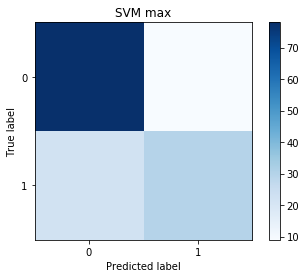

In [23]:
classes = ['0','1']            
fig, ax = plt.subplots()
im = ax.imshow(max_confusio_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(max_confusio_matrix.shape[1]),
        yticks=np.arange(max_confusio_matrix.shape[0]),
        xticklabels=classes, 
        yticklabels=classes,
        title="SVM max",
        ylabel='True label',
        xlabel='Predicted label')
print("The max precision was:\n%s" % max_precision)